Segundo desafio do bootcamp de machine learning 

Analise exploratoria de dados

Pre-processamento dos dados

Comparacao e ajustes de modelos
- Algoritmo KNN
- Algoritmo Árvore de Decisão
- Algoritmo Floresta Randômica
- Algoritmo SVM
- Algoritmo Rede MLP

In [55]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
#importando o dataset no google colab
#versao modificada do dataset “Wine Quality” disponível no UCI Machine Learning Repository 
from google.colab import files
upload = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [8]:
nome = "winequality-red.csv"
df = pd.read_csv(nome,sep=';')

In [9]:
#visualizacao do dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
#informacoes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#numero de instancias e atributos do dataset
print('Instancias: {}'.format(df.shape[0]))
print('Atributos: {}'.format(df.shape[1]))

Instancias: 1599
Atributos: 12


In [18]:
#tipos de dados existentes no dataset
df.dtypes.nunique()

2

In [23]:
#proporcao de valores nulos na coluna "residual sugar" (resíduo de açucar)
null_values = df['residual sugar'].isna().sum()
total = df['residual sugar'].count() + null_values
prop = (null_values/total)*100
print('A proporcao de valores nulos é {:.2f}%'.format(prop))

A proporcao de valores nulos é 0.00%


In [21]:
#descricao estatistica do dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
#encontrando a mediana da coluna "residual sugar"
mediana = df['residual sugar'].median()
print("Mediana: {}".format(mediana))

Mediana: 2.2


In [31]:
#coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH"
df[['fixed acidity','pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


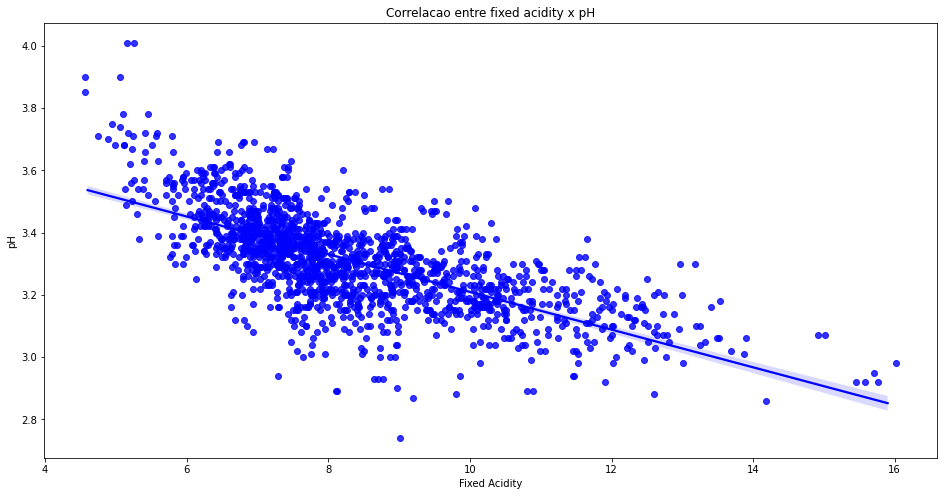

In [35]:
plt.figure(figsize=(16,8))
sns.regplot(x = 'fixed acidity', y ='pH', data = df, color='b',x_jitter=0.2)
plt.title('Correlacao entre fixed acidity x pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

In [36]:
#correlação de Pearson entre as variáveis "quality" e "alcohol"
df[['quality','alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


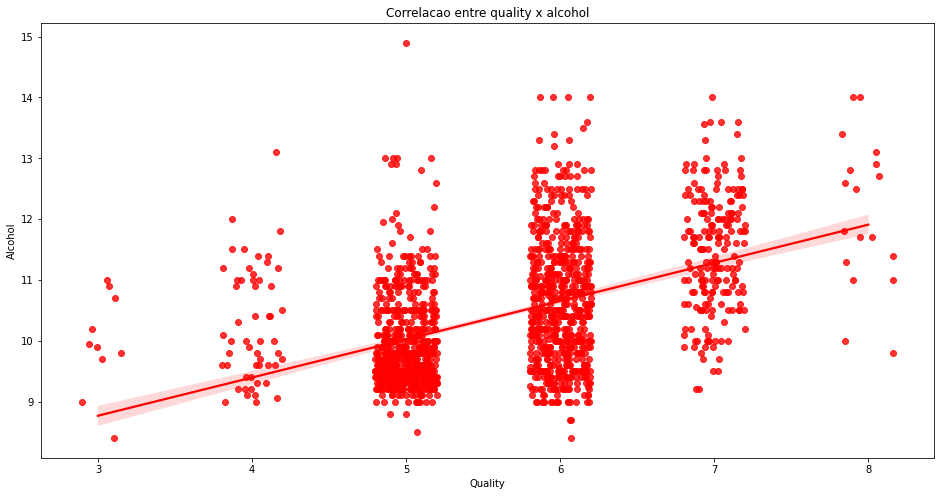

In [37]:
plt.figure(figsize=(16,8))
sns.regplot(x = 'quality', y ='alcohol', data = df, color='r',x_jitter=0.2)
plt.title('Correlacao entre quality x alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

In [38]:
#Quantas instancias existem para a qualidade de vinho igual a 5?
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Pre processing 

In [46]:
#separacao do dataset
X = df.iloc[:,:-1] #variaveis preditoras
y = df.iloc[:,-1] #target

In [49]:
#normalizacao dos dados de entrada com os valores "default"
#aplicando a normalizacao com MinMaxScaler
scaler = MinMaxScaler()
array = scaler.fit_transform(X)
colunas = X.columns
df_normalizado = pd.DataFrame(array,columns = colunas)
df_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [50]:
#Qual o valor minimo para a variavel "fixed acidity"
df_normalizado['fixed acidity'].min()

0.0

In [51]:
#Divisao do dataset em dados de treinamento e teste 70% treinamento 30% teste
X_train,X_test,y_train,y_test = train_test_split(df_normalizado,y,test_size=0.3,random_state=1)

Algoritmo KNN: 

In [53]:
# Algoritmo KNN K-NearestNeighbors analisando os 5 vizinhos mais próximos
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train,y_train)
y_pred = clf_KNN.predict(X_test)

In [54]:
#Analise de acuracia do modelo de KNN
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test,y_pred)
print('Para o algoritmo KNN a acuracia foi de : {}'.format(acuracia))

Para o algoritmo KNN a acuracia foi de : 0.5645833333333333


Algoritmo Árvore de Decisão

In [56]:
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train,y_train)
y_pred_arvore = clf_arvore.predict(X_test)

In [57]:
#Analise de acuracia do modelo de arvore de decisao
acuracia_arvore = accuracy_score(y_test,y_pred_arvore)
print('Para o algoritmo Arvore de decisao a acuracia foi de : {}'.format(acuracia_arvore))

Para o algoritmo Arvore de decisao a acuracia foi de : 0.5916666666666667


Algoritmo Floresta Randômica: 

In [58]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train,y_train)
y_pred_floresta = clf_floresta.predict(X_test)

In [59]:
#Analise de acuracia do modelo RandomForest
acuracia_floresta = accuracy_score(y_test,y_pred_floresta)
print('Para o algoritmo Random Forest a acuracia foi de : {}'.format(acuracia_floresta))

Para o algoritmo Random Forest a acuracia foi de : 0.6791666666666667


Algoritmo SVM: 

In [60]:
clf_svm=SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train,y_train)
y_pred_SVM = clf_svm.predict(X_test)

In [61]:
#Analise de acuracia do modelo SVM
acuracia_SVM = accuracy_score(y_test,y_pred_SVM)
print('Para o algoritmo SVM a acuracia foi de : {}'.format(acuracia_SVM))

Para o algoritmo SVM a acuracia foi de : 0.5854166666666667


Algoritmo Rede MLP: 

In [64]:
#importando biblioteca da rede MLP
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train,y_train)
y_pred_MLP = clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
 #Analise de acuracia do modelo MLP Neural network
acuracia_MLP = accuracy_score(y_test,y_pred_MLP)
print('Para o algoritmo SVM a acuracia foi de : {}'.format(acuracia_MLP))

Para o algoritmo SVM a acuracia foi de : 0.6


Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?

In [66]:
df_modified = df.copy()
#separacao do dataset
X_mod = df_modified.iloc[:,:-1] #variaveis preditoras
y_mod = df_modified.iloc[:,-1] #target
#transformando o target em sistema binário
Y_mod = y_mod.replace({3:0,4:0,5:0,6:1,7:1,8:1})
#normalizacao dos dados de entrada com os valores "default"
#aplicando a normalizacao com MinMaxScaler
scaler = MinMaxScaler()
array_mod = scaler.fit_transform(X_mod)
colunas = X_mod.columns
df_mod_norm = pd.DataFrame(array_mod,columns = colunas)
df_mod_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [73]:
#Divisao do dataset em dados de treinamento e teste 70% treinamento 30% teste
X_train,X_test,y_train,y_test = train_test_split(array_mod,Y_mod,test_size=0.3,random_state=1)

In [75]:
clf_floresta_mod = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta_mod.fit(X_train,y_train)
y_pred_floresta_mod = clf_floresta_mod.predict(X_test)
#Analise de acuracia do modelo RandomForest
acuracia_floresta_mod = accuracy_score(y_test,y_pred_floresta_mod)
print('Para o algoritmo Random Forest a acuracia foi de : {}'.format(acuracia_floresta_mod))

Para o algoritmo Random Forest a acuracia foi de : 0.8041666666666667
